1. "implementing Remote Procedure Calls" by Birrell and Nelson

### Why RPC
Example 1: GetFile App
1. client-server
    1. create and init sockets API
    1. allocate and populate buffers
    1. include 'protocal' info
        1. getfile, size
    1. copy data into buffers
        1. filename, file...
Example 2: ModImage App 
1. client-server
    1. create and init sockets API
    1. allocate and populate buffers
    1. include 'protocal' info
        1. algorithm, size
    1. copy data into buffers
        1. image data
1. common steps related to remote IPC => remote Procedure Calls (RPC)

### RPC == intended to simplify the development of cross-address space & cross-machine interactions
1. benefits
    1. higher level interface for data movement & communication
    1. error handling
    1. hiding comlexities of cross-machine interactions

### RPC Requirements
1. client/server interactions
1. Procedure Call Interface => RPC
    1. synchornize call semantics (call will be blocked until results completed
1. Type checking
    1. error handling
    1. packet bytes interpretation
1. cross-machien conversion
    1. e.g. big/little endian
    1. hide all conversion details from developers
    1. data sent/received network format agreed upfront
1. higher-level protocal
    1. access control, fault tolerance.. 
    1. support different transport protocols

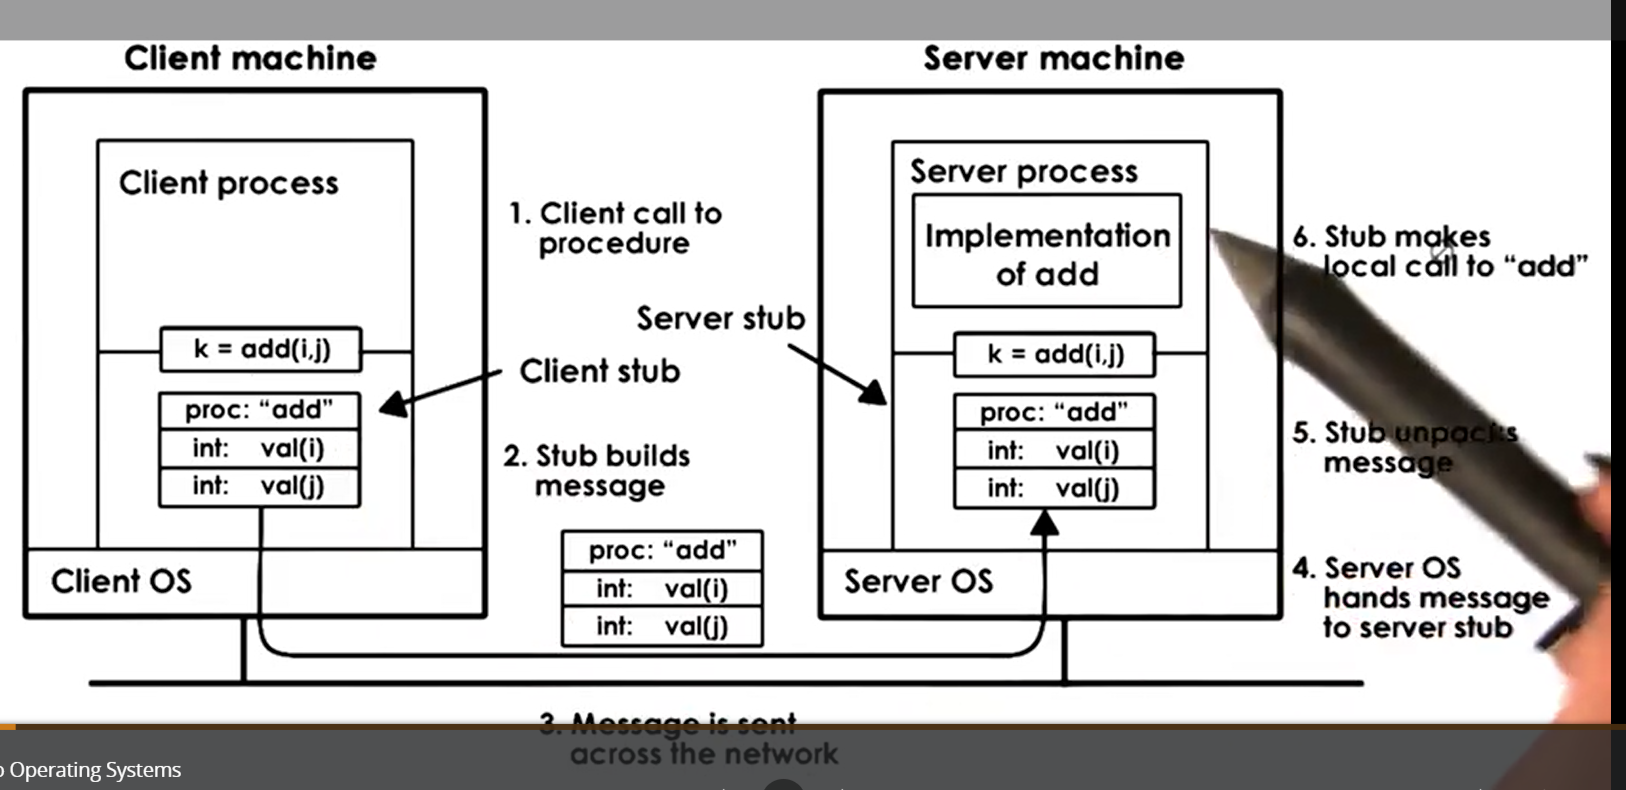

### RPC Steps
1. register: server registers procedure, args types, location (ip address, porting number etc)
1. bind: client finds and binds to desired server
1. call: client make RPC call, control passed to client stub, client code blocks
1. marshal: client stub marshals arguments (serialize args into buffer)
1. send: client sends massage to server
1. receive: server receives message; passes message to correct server-stub; access control checks 
1. unmarshal: server stub "unmarchals" args (extracts args & creates data structures)
1. actual call: server stub calls local procedure implementation
1. result: server performs operation and comuters result of RPC operation
1. results will be passed to client side on similar steps on return

### we need an agreement
1. What can the server do
1. what arguemtns are requried for the various operations?
1. why?
    1. client side bind decision
    1. runtim to automate stub generation
1. Interface Definition Language (IDL)

### Interface Specification with IDL
1. and IDL used to describe the interface the server export
    1. procedure name, arg, and result types
    1. version number
        1. which server has the most current implementation)
        1. useful for incremental upgrade
    1. RPC can use IDL that is 
        1. language-agnostic 
            1. XDR in SunRPC (external data representation)
        1. language specific
            1. Java in Java RMI 
        1. both are just interface, not implementation

### Marshalling 
1. serialize arguments of the procedure to contiguous memory locaion of the buffer (encoding)

### Unmarshalling
1. unserialize 

1. RPC includes a special complier taht takes and IDL specification that descriges the procedure prototype and the data typeo for the arguments
1. from that it generates the amrshal link and the unmarshal link routines
1. routines responsible to generate the encoding related action
1. developers link the code with the program fils for the server/client

### Binding
Used by the client to determine
1. which server should it connect to
    1. server name, version number...
1. how will it connect  to that server?
    1. ip address, network protocol
1. register == database of avaiable services
    1. search for service name to find service (which)
    1. and contact details (how)
1. distributed
    1. any RPC service can register 
1. machien-specific
    1. for services running on same machine
    1. clients must know machine address
    1. registry provides port number needed for connection
1. needs naming protocols
    1. exact match for name and version number of service requested
    1. consider simialr words (not considered in  this course)

 1. who can provide  the service?
     1. look upo registry for image processing
 1. what services are provided
     1. compress, filter, version number => IDL
 1. How will they send/recv?
     1. TCP/UDP => register 

### What about pointers?
doesn't make sense since the pointer points to local address
1. solutions
    1. no pointers
    1. serialize pointers: copy referenced (pointed to) data structure to send buffer

### Handling partial Failures
1. when a client hangs, what's the problem?
    1. server down? 
    1. service down?
    1. network down?
    1. message lost?
1. timeout and retry => no guaranttees
RPC:
    1. special RPC error notification (signal, exception...) catch all possible ways in which the RPC call can (partially) fail

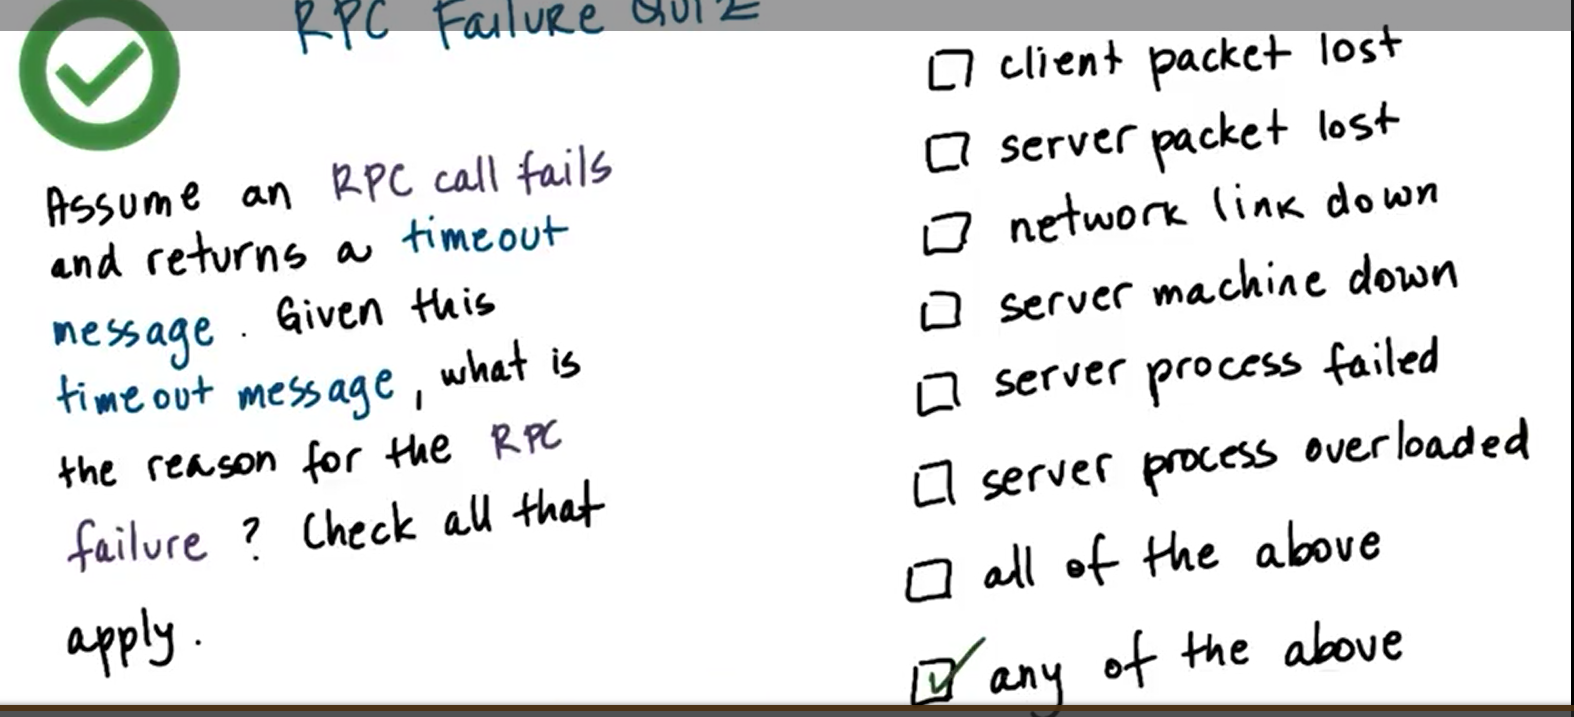

### Design decisions for RPC systems 
1. binding
    1. how to find the server
1. IDL:
    1. how to talk to the server
    1. how to package data
1. pointers as arguments
    1. disable
    1. serialize pointer
1. partial failures & special error notification


 ### What's Sun RPC
 1. developed in 80s by Sun for UNIX
 1. now widely avaiable on other platforms
 1. design choices
     1. binding: per-machine (server) registery deamon, client need to talk to any service it need to first look at the registry to find out how to contact the service requested
     1. IDL => XDR (for interface specification and for encoding)
     1. pointers => allowed and serialized
     1. failures => retries; return as much information as possible

### SUN RPC Overview
1. client-server vai procedure calls
1. interface specified via XDR (.x file)
1. rpcgen compiler => conferts .x to language-specific stubs for client/server
1. server registers with local registry deamon
1. registry (per-machien)
    1. name of the service
    1. version
    1. protocol(s)
    1. port number 
1. binding creates handle
    1. client uses handle in calls
    1. RPC runtime uses handle to track per-client RPC state
1. client and server on same or different machines
1. domumentation, tutorials and examples maintained by Oracle
    1. TI-RPC == tranport-Independent Sun RPC (protocols used doesn't have to specified at compile time, can specify at runtime)
    1. provides SUN RPC/XDR documentation and code examples
    1. older onlin reference and relevant
    1. Linux main pages for "RPC" (linux supported APIs)

### Sun RPC: XDR Example
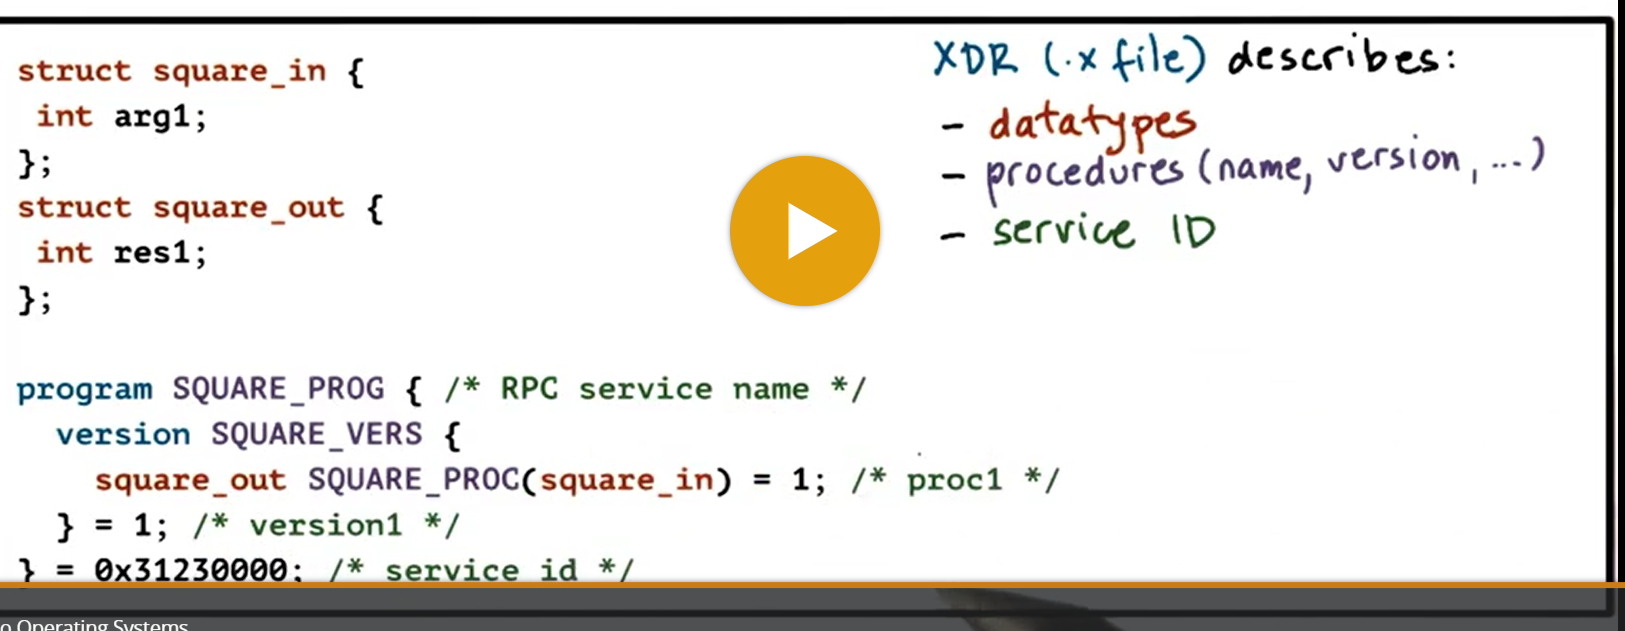

### Service ID Conventions
1. 0x0000 0000 = 0x1fff ffff == defined by Sun
1. 0x2000 0000 = 0x3fff ffff == range to use
1. 0x4000 0000 = 0x5fff ffff == transient
1. 0x6000 0000 = 0xffff ffff == reserved


###  Compiling XDR
1. recgen compiler
    1. rpcgen -c square.x
        1. square.h => data types and funtion definitions
        1. square_svc.c => server stub and skelethon (main)
            1. main => registreation/housekeeping
            1. square_prog_1
                1. internal code, request parsing, argument marshaling
                1. _1 == version 1
            1. square_prog_1_svc => 
                1. actual procedure;
                1. must be implemented by developer
        1. square_clnt.c => client stub
            1. square_proc_1: wrapper for RPC call to the server square_proc_1_svc
            1. y = square_proc_1(&x..)
        1. square_xdr.c => common marshalling routines

### RPC Develpment Summary
 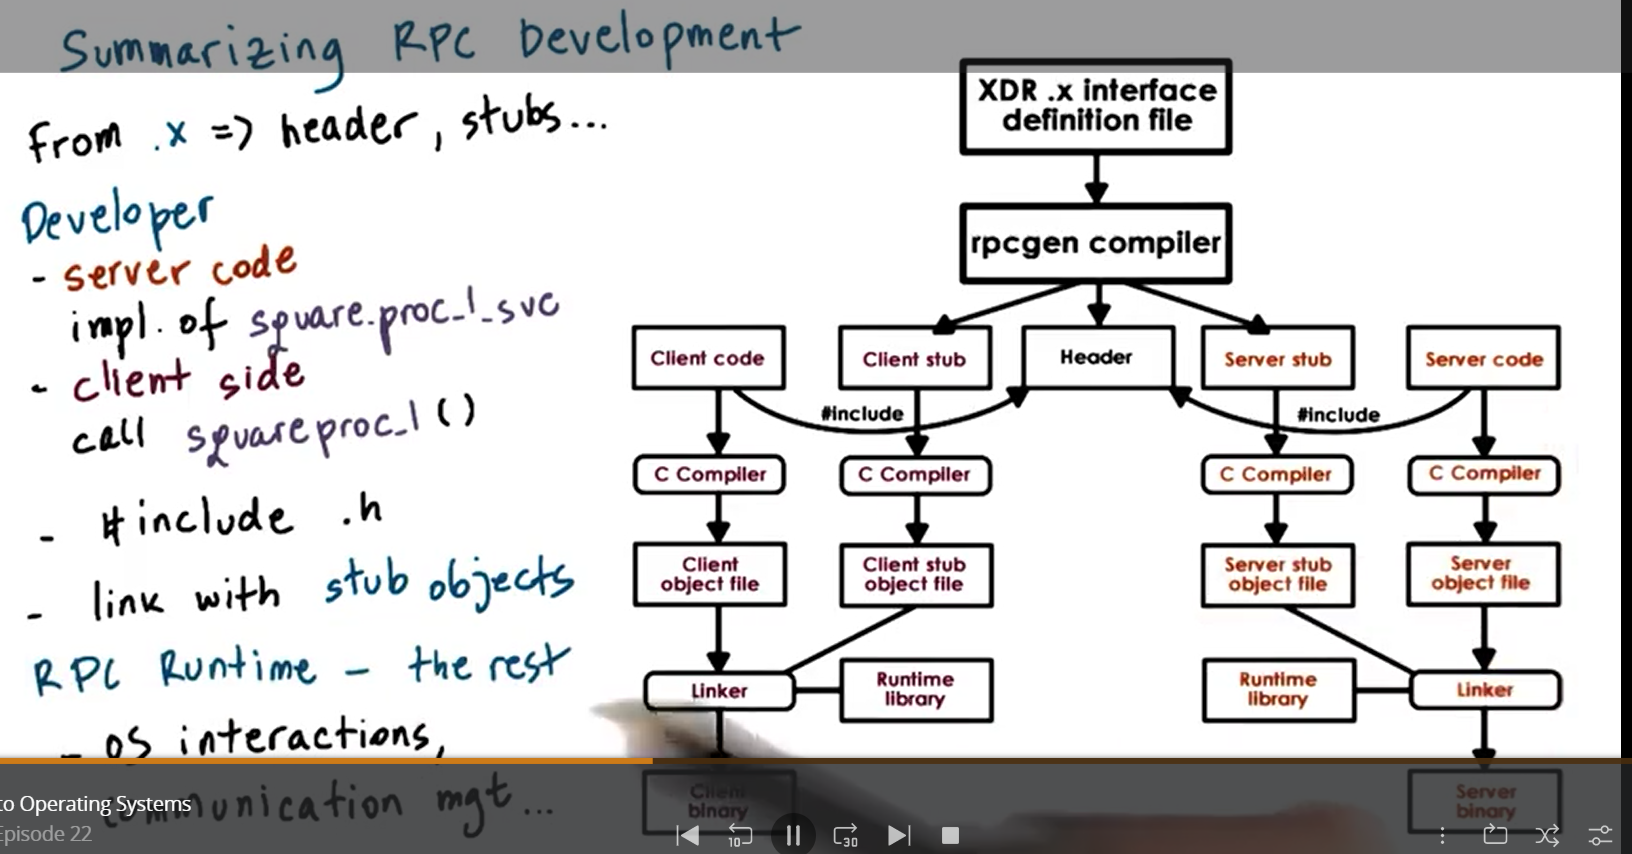

1. rpcgen -c square.x => not thread safe
    1. a number of statically allocated data structures included for the result
1. rpcgen -c -m square.c => multithreading safe
    1. status = square_proc_1
    1. dynamically allocate memory for the results
    1. doesn't make a multithreaded "_svc.c" server
    1. on Solaris "-a" => multithread server
    1. on Linux has to be done manually

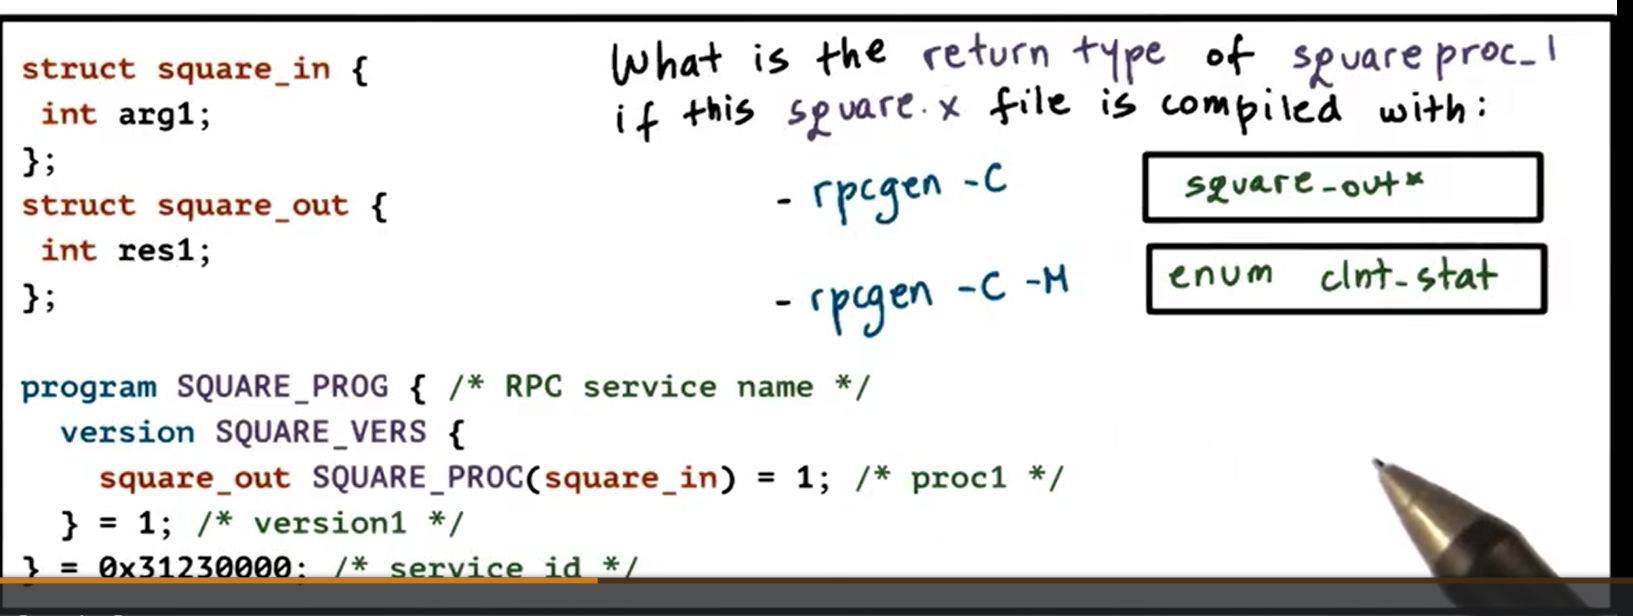

### Sun RPC： Registry
1. RPC deamon == port mapper
    1. /sbin/portmap (need sudo privileges)
    1. the process taht has to be contacted both 
        1. by the server when they need to register a service
        1. by the clients when they need to find what is the specific contact  information for a particular servcie 
    1. information:
        1. port number
        1. version
        1. protocols
1. Query with rpcinfo -p
    1. /usr/sbin/rpcinfo -p
    1. program id,version, protocol(tcp/udp), socket port nubmer, service name...  
    1. port mapper runs with tcp and udp on port 111

### Sun RPC: Binding
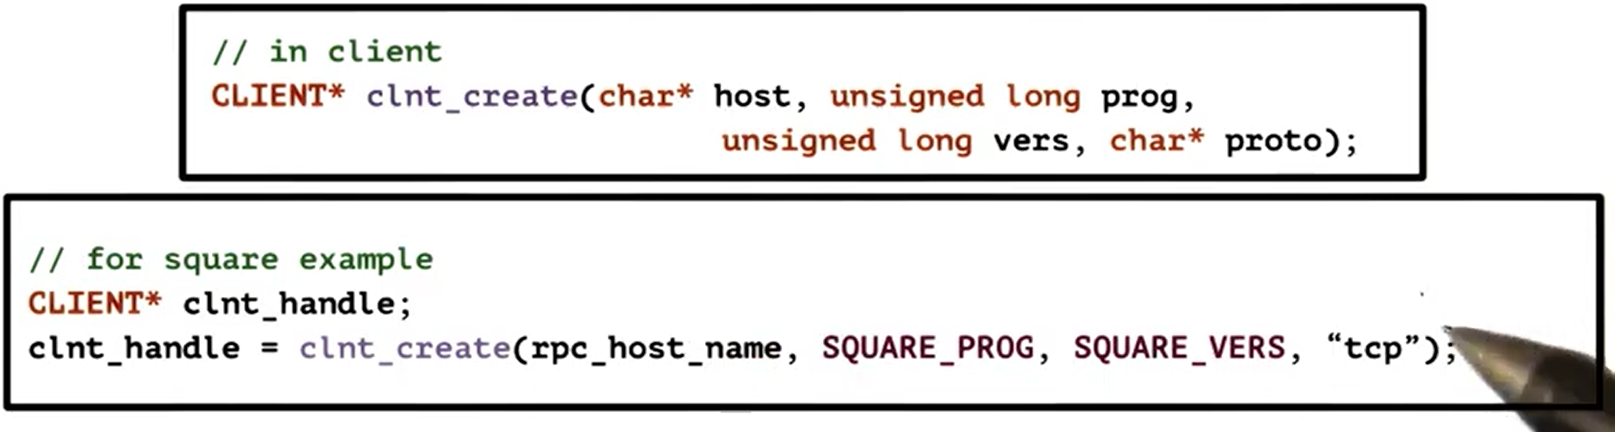
1. client type
    1. client handle
    1. status
    1. error
    1. authantication 

### XDR Data Type
1. default types
    1. char
    1. byte
    1. int
    1. float
1. additional XDR types
    1. const (#define)
    1. hyper (64-bit integer)
    1. guadruple (128-bit float)
    1. opaque ( ~ c byte)
         1. uniterpreted binary data
 1. arrays
     1. fixed-length array
         1. e.g. int data[80]
     1. variable-length array
         1. e.g. int data<80> (max length)
         1. translates into a data structure with "len"(actual length) and "val" fields
     1. except for strings
         1. string line<80> c pointere to cahr
         1. stored in memory as a normal null-terminated string
         1. encoded (for transmission) as a pair of length and data

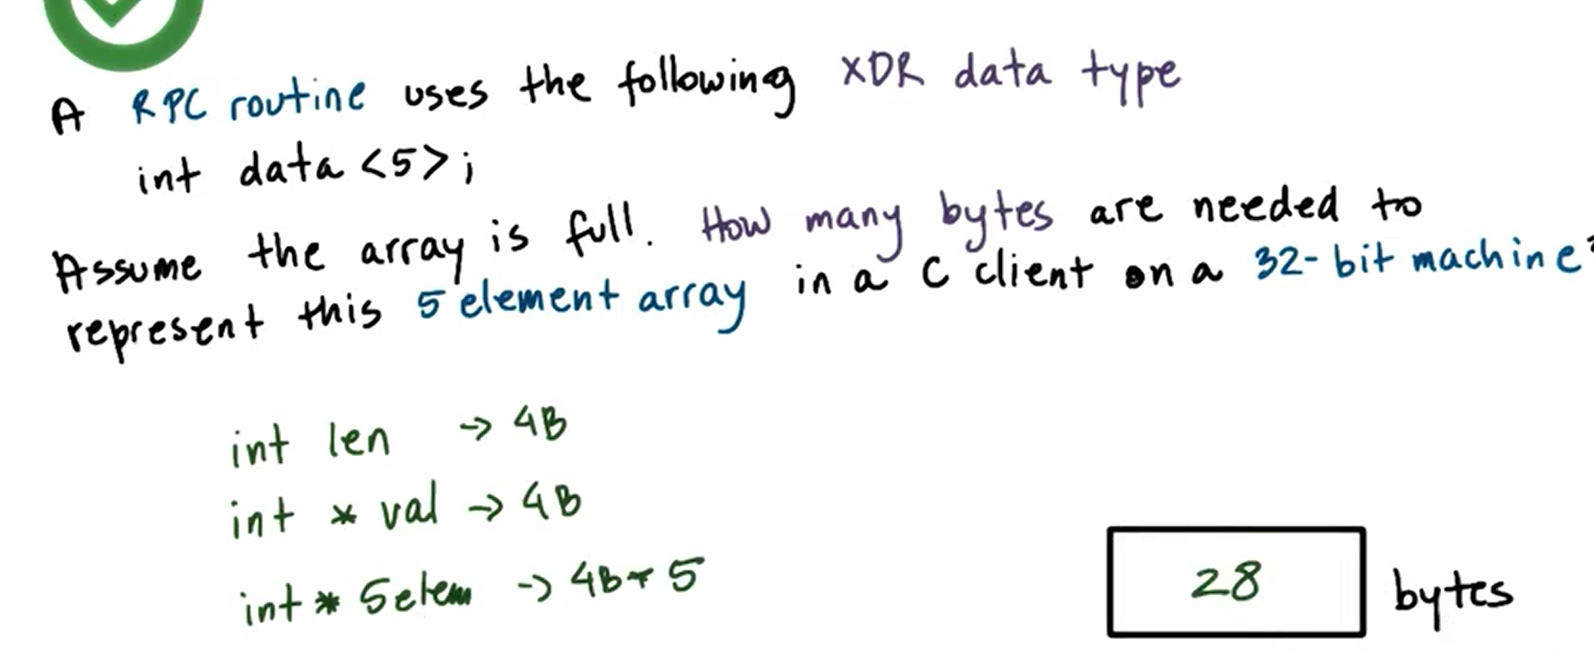

### XDR Routine
1. Marshalling/unmarshalling
    1. found in square_xdr.c
1. clean-up
    1. xdr_free()
    1. user_defined_freeresoult procedure
    1. e.g. square_prog_1_freeresult
    1. called after results returned

### what's goes on the wire
1. transport header
    1. e.g. TCP, UDP
1. RPC header
    1. service procedure Id
    1. version number
    1. request Id
1. actual data
    1. argument or results
    1. encoded in a bytestream depending on data type

### XDR Encoding
1. XDR == IDL + the encoding
    1. i.e. the binary representation of data "on-the-wire"
1. XDR encoding rules
    1. all data types are encoded in multiples of 4 bytes (helps to alignment when moving data to and from memory and the network packets and the network card
    1. big endian is the transmission standard
    1. two's complement is used for integers
    1. IEEE format is used for floating point
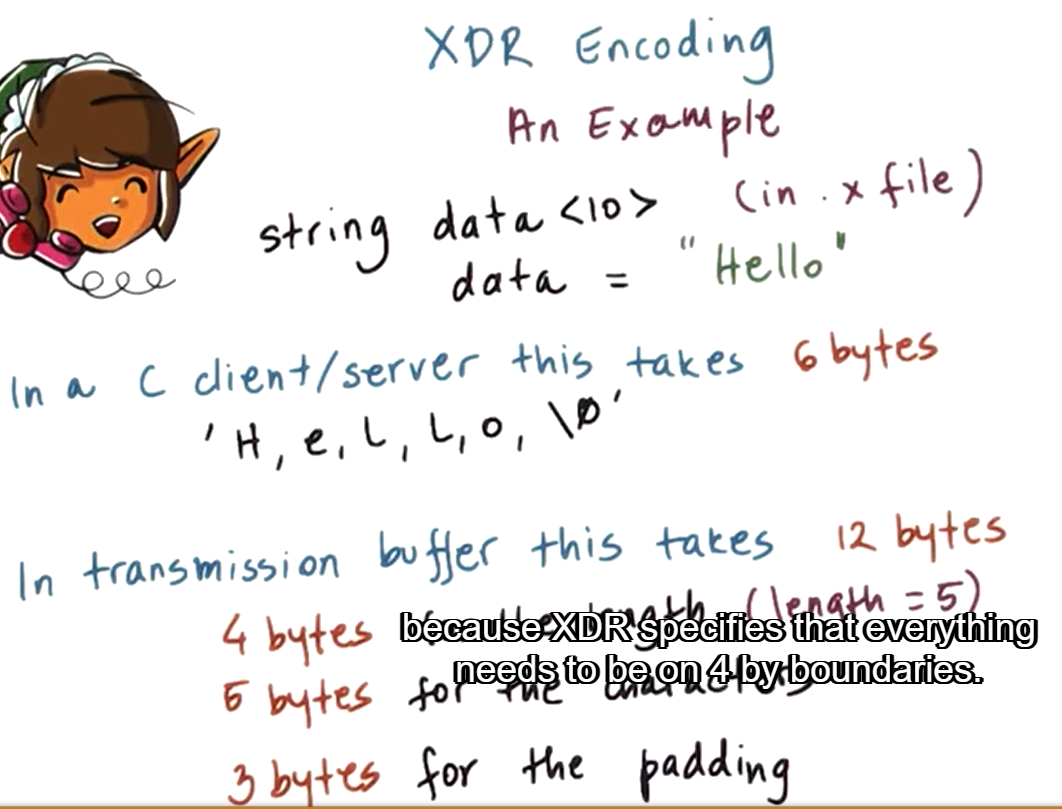

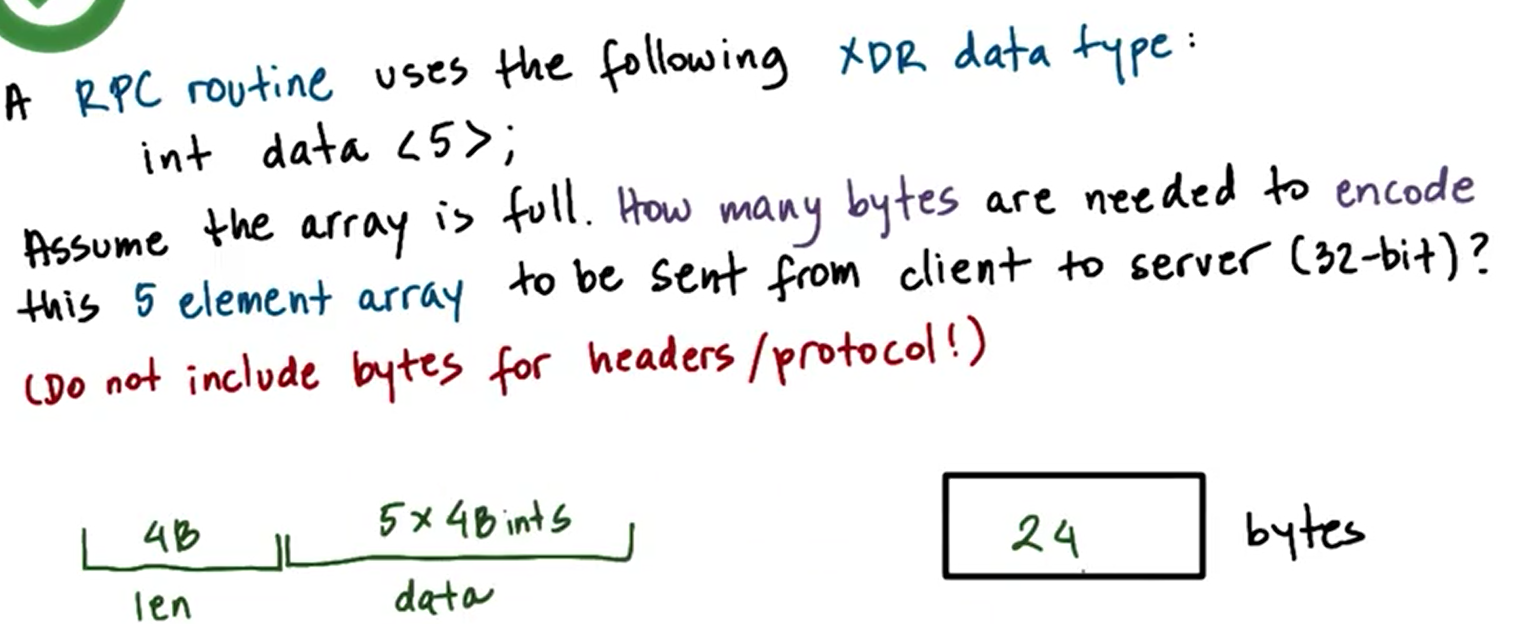

### Java Remote Method Invovations - RMI
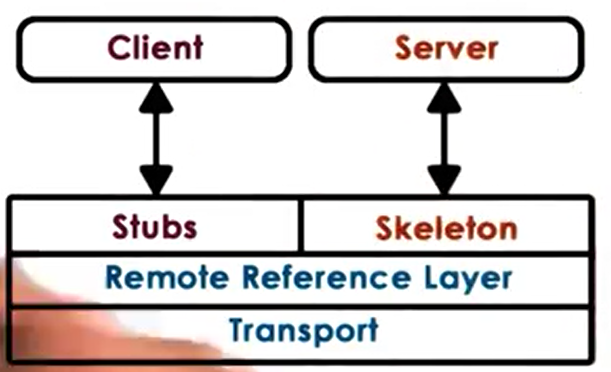
1. among address spaces in JVM(s)
1. mactches Java OO semantics
1. IDL == Java (language-specific)
1. RMI Runtime
    1. remote reference layer
        1. unicast (interact with a single server)
        1. broadcast (with multi servers)
        1. return-first-response (return the first response)
        1. return-if-all-match (return only all response match)
    1. transport
        1. tcp
        1. udp
        1. shared memroy